In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("PPDA vs Shots Against.csv")

In [4]:
plt.style.use('seaborn-ticks')

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
df

,Rk,Team,League,Shots Received,PPDA
0,1,Wolfsburg,Bundesliga,11.90,11.1
1,2,Union Berlin,Bundesliga,12.10,16.8
2,3,Stuttgart,Bundesliga,16.90,12.4
3,4,RB Leipzig,Bundesliga,11.20,9.4
4,5,Mainz 05,Bundesliga,11.60,10.8
...,...,...,...,...,...
93,94,Fiorentina,Serie A,9.72,12.2
94,95,Empoli,Serie A,16.20,11.2
95,96,Cagliari,Serie A,15.80,15.1
96,97,Bologna,Serie A,11.90,13.4


In [5]:
plt.rcParams["font.size"]=13
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelsize"]="x-large"

In [6]:
import statistics

medianppda = statistics.median(df['PPDA'])
medianshots = statistics.median(df['Shots Received'])
print(medianppda,medianshots)

12.3 12.3


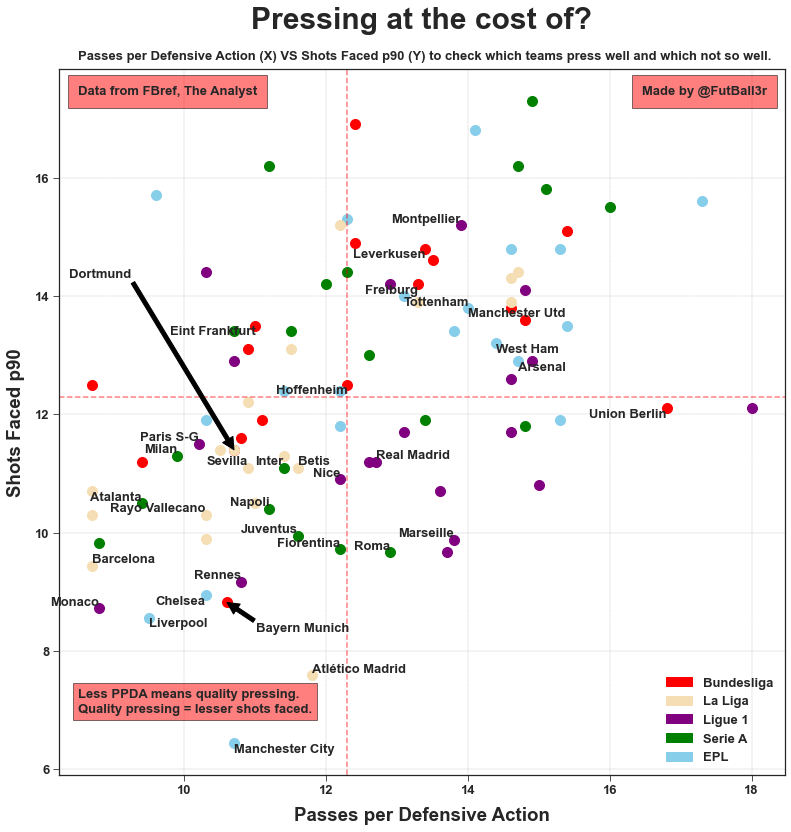

In [9]:
from numpy.ma.extras import average
import matplotlib.patches as mpatches

plt.figure(figsize=(13, 13))
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.25)

teams=['Bayern Munich','Dortmund']
x_bayern,y_bayern,x_dortmund,y_dortmund =0,0,0,0
names = ['Tottenham','West Ham','Manchester Utd','Liverpool','Arsenal','Manchester City',
         'Real Madrid','Barcelona','Atlético Madrid','Betis',
         'Paris S-G','Nice','Marseille','Rennes','Montpellier','Monaco',
         'Juventus','Atalanta','Milan','Inter','Napoli','Fiorentina','Roma',
         'Freiburg','Leverkusen','Hoffenheim','Union Berlin','Eint Frankfurt']
ind = 0
for i in range(len(df['Team'])):
    if df['League'][i] == 'Bundesliga':
        plt.scatter(df['PPDA'][i],df['Shots Received'][i],color= 'red',s=100)
        if df['Team'][i] in names:
            plt.annotate(df['Team'][i],(df['PPDA'][i],df['Shots Received'][i]),horizontalalignment='right', verticalalignment='top')
        if df['Team'][i] == 'Bayern Munich':
            x_bayern=df['PPDA'][i]
            y_bayern=df['Shots Received'][i]
        if df['Team'][i] == 'Dortmund':
            x_dortmund=df['PPDA'][i]
            y_dortmund=df['Shots Received'][i]
    if df['League'][i] == 'La Liga':
        plt.scatter(df['PPDA'][i],df['Shots Received'][i],color= 'wheat',s=100)
        if df['Team'][i] in names:
            plt.annotate(df['Team'][i],(df['PPDA'][i],df['Shots Received'][i]),horizontalalignment='left', verticalalignment='bottom')
        if df['Team'][i] == 'Sevilla'or df['Team'][i] == 'Rayo Vallecano':
            plt.annotate(df['Team'][i],(df['PPDA'][i],df['Shots Received'][i]),horizontalalignment='right', verticalalignment='bottom')
    if df['League'][i] == 'Serie A':
        plt.scatter(df['PPDA'][i],df['Shots Received'][i],color= 'green',s=100)
        if df['Team'][i] in names:
            plt.annotate(df['Team'][i],(df['PPDA'][i],df['Shots Received'][i]),horizontalalignment='right', verticalalignment='bottom')
    if df['League'][i] == 'Ligue 1':
        plt.scatter(df['PPDA'][i],df['Shots Received'][i],color= 'purple',s=100)
        if df['Team'][i] in names:
            plt.annotate(df['Team'][i],(df['PPDA'][i],df['Shots Received'][i]),horizontalalignment='right', verticalalignment='bottom')
    if df['League'][i] == 'Premier League':
        plt.scatter(df['PPDA'][i],df['Shots Received'][i],color= 'skyblue',s=100)
        if df['Team'][i] in names:
            plt.annotate(df['Team'][i],(df['PPDA'][i],df['Shots Received'][i]),horizontalalignment='left', verticalalignment='top')
        if df['Team'][i] == 'Chelsea':
            plt.annotate(df['Team'][i],(df['PPDA'][i],df['Shots Received'][i]),horizontalalignment='right', verticalalignment='top')

plt.annotate('Bayern Munich', xy=(x_bayern,y_bayern),  xycoords='data',
            xytext=(0.4, 0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='bottom')

plt.annotate('Dortmund', xy=(x_dortmund,y_dortmund),  xycoords='data',
            xytext=(0.1, 0.7), textcoords='axes fraction',
            arrowprops=dict(facecolor='black',mutation_scale=50),
            horizontalalignment='right', verticalalignment='bottom')

plt.axhline(y=medianshots, color='r', linestyle='--',alpha =0.5)
plt.axvline(x=medianppda, color='r', linestyle='--',alpha =0.5)
                         
#Legend
bl = mpatches.Patch(color='red', label='Bundesliga')
ll = mpatches.Patch(color='wheat', label='La Liga')
l1 = mpatches.Patch(color='purple', label='Ligue 1')
s = mpatches.Patch(color='green', label='Serie A')
epl = mpatches.Patch(color='skyblue', label='EPL')
plt.legend(handles=[bl,ll,l1,s,epl])
plt.rcParams["legend.loc"] = "lower right"

plt.text(8.5, 17.4, 'Data from FBref, The Analyst',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.text(16.45, 17.4, 'Made by @FutBall3r',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.text(8.5, 7, 'Less PPDA means quality pressing. \nQuality pressing = lesser shots faced.',wrap=True,
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})

plt.xlabel('Passes per Defensive Action',labelpad=10,fontweight = "bold")
plt.ylabel('Shots Faced p90',labelpad=10,fontweight = "bold")
plt.title("Pressing at the cost of?",pad=40,size=30,fontweight = "bold")
plt.text(8.5,18,s="Passes per Defensive Action (X) VS Shots Faced p90 (Y) to check which teams press well and which not so well.")
plt.show()

# plt.savefig('PPDA vs Shots Plot.png',dpi=600,bbox_inches='tight')